<a href="https://colab.research.google.com/github/Salitre97/ECGR-4105-Intro-to-ML/blob/main/Homework_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [298]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [300]:
file_path = '/content/drive/MyDrive/ML-4105/diabetes.csv'

In [301]:
diabetes = pd.DataFrame(pd.read_csv(file_path))
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [302]:
X = diabetes.iloc[:,[0,1,2,3,4,5,6,7]].to_numpy()
Y = diabetes.iloc[:,8].to_numpy()
X[:5]

array([[6.000e+00, 1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01,
        6.270e-01, 5.000e+01],
       [1.000e+00, 8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01,
        3.510e-01, 3.100e+01],
       [8.000e+00, 1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01,
        6.720e-01, 3.200e+01],
       [1.000e+00, 8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01,
        1.670e-01, 2.100e+01],
       [0.000e+00, 1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01,
        2.288e+00, 3.300e+01]])

In [303]:
#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [304]:
#Now we’ll do feature scaling to scale our data between 0 and 1 to get better accuracy.
#Here Scaling is important because there is a huge difference between Age and EstimatedSalay.

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [305]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [306]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array([1, 0, 0, 1, 0, 0, 1, 1, 0])

In [307]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[98,  9],
       [18, 29]])

In [308]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


Text(0.5, 427.9555555555555, 'Predicted label')

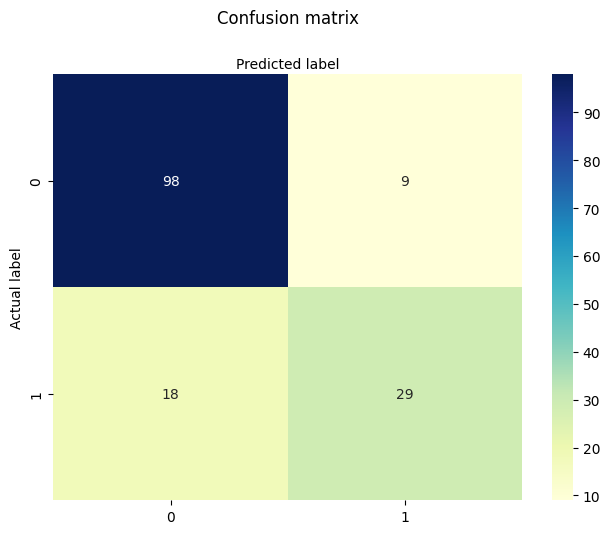

In [309]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 2a


In [310]:
file_path_1 = '/content/drive/MyDrive/ML-4105/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path_1))
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [311]:
cancer.shape

(569, 33)

In [312]:
X_1 = cancer.iloc[:,2:30].to_numpy()
Y_1 = cancer.iloc[:,1].to_numpy()
X_1[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e+01, 2.553e+01, 1.525e+02, 1.709e+03,
      

In [313]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X_1, Y_1, test_size = 0.20, random_state = 0)

In [314]:
X1_train_std = sc_X.fit_transform(X1_train)
X1_test_std = sc_X.transform(X1_test)

In [315]:
classifier_1 = LogisticRegression(random_state=0)
classifier_1.fit(X1_train_std, Y1_train)

LogisticRegression(random_state=0)

In [316]:
Y1_pred = classifier_1.predict(X1_test_std)
Y1_pred[0:9]

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [317]:
cnf_matrix_1 = confusion_matrix(Y1_test, Y1_pred)
cnf_matrix_1

array([[65,  2],
       [ 3, 44]])

In [318]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))
print("Precision:", metrics.precision_score(Y1_test, Y1_pred, pos_label='M'))
print("Recall:", metrics.recall_score(Y1_test, Y1_pred, pos_label='M'))
print("F1 Score:", f1_score(Y1_test, Y1_pred, pos_label='M'))


Accuracy: 0.956140350877193
Precision: 0.9565217391304348
Recall: 0.9361702127659575
F1 Score: 0.9462365591397849


Text(0.5, 427.9555555555555, 'Predicted label')

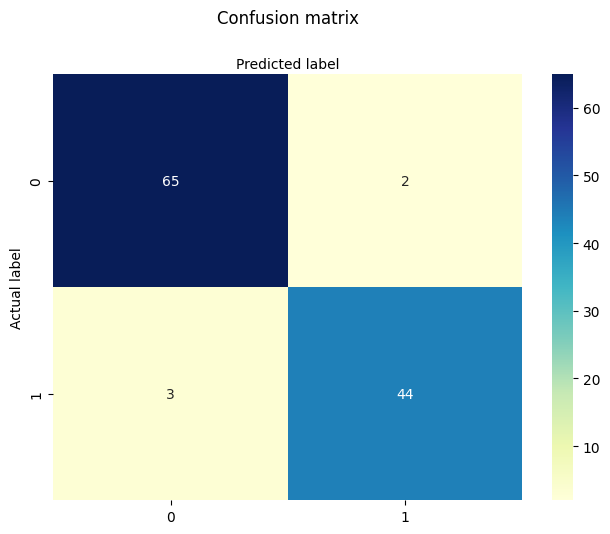

In [319]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 2b

In [333]:
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X1_train_std, Y1_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X1_train_std, Y1_train))
    print('Test accuracy:', clf.score(X1_test_std, Y1_test))
    print('')

C: 10
Training accuracy: 0.9868131868131869
Test accuracy: 0.956140350877193

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.001
Training accuracy: 0.6373626373626373
Test accuracy: 0.5877192982456141



In [334]:
from sklearn.metrics import classification_report
# Classification Report
model = LogisticRegression(solver='liblinear')
model.fit(X1_train, Y1_train)
predicted_1 = model.predict(X1_test)
report_1 = classification_report(Y1_test, predicted_1)
print(report_1)

              precision    recall  f1-score   support

           B       0.98      0.94      0.96        67
           M       0.92      0.98      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [335]:
# Confusion Matrix
model = LogisticRegression(solver='liblinear')
model.fit(X1_train, Y1_train)
predicted_1 = model.predict(X1_test)
matrix_1= confusion_matrix(Y1_test, predicted_1)
print(matrix_1)

[[63  4]
 [ 1 46]]


Text(0.5, 427.9555555555555, 'Predicted label')

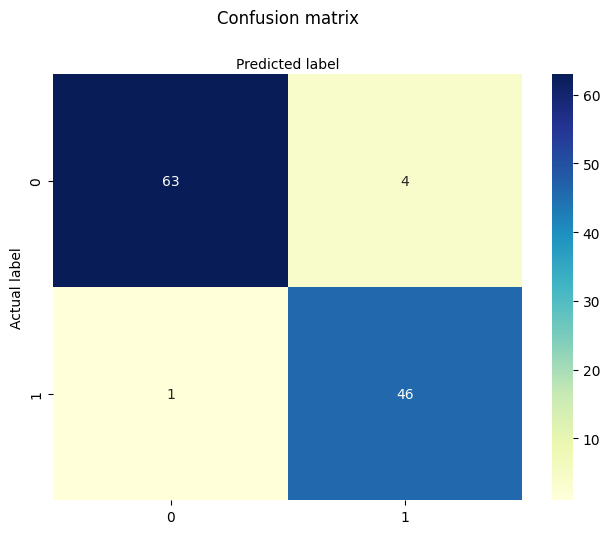

In [336]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix_1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 3 - Naive Bayesian Model

In [324]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
# Initialize and train the Naive Bayes model
model1 = GaussianNB()
model1.fit(X1_train_std, Y1_train)

# Make predictions
Y2_pred = model.predict(X1_test_std)

# Evaluate the model
print(metrics.classification_report(Y1_test, Y2_pred))

              precision    recall  f1-score   support

           B       0.69      0.72      0.70        67
           M       0.57      0.53      0.55        47

    accuracy                           0.64       114
   macro avg       0.63      0.62      0.63       114
weighted avg       0.64      0.64      0.64       114



In [325]:
from sklearn.metrics import confusion_matrix
cnf_matrix_2 = confusion_matrix(Y1_test, Y2_pred)
cnf_matrix_2

array([[48, 19],
       [22, 25]])

Text(0.5, 427.9555555555555, 'Predicted label')

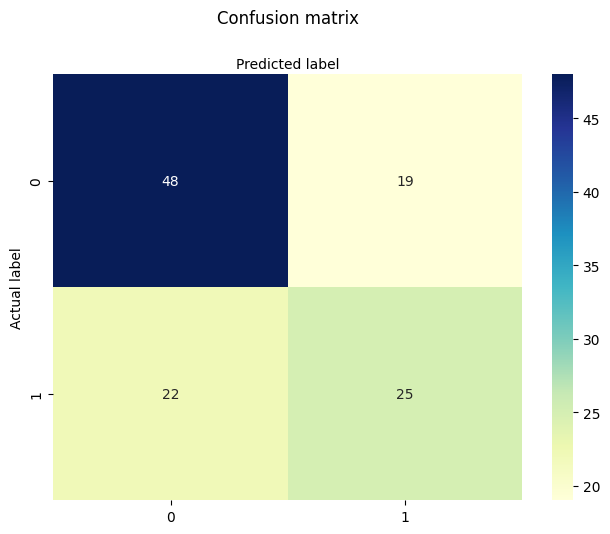

In [326]:
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# PROBLEM 4- PCA

In [327]:
from sklearn.decomposition import PCA
max_features = X1_train_std.shape[1]
best_accuracy = 0
best_k = 0
best_precision = 0
best_recall = 0
best_f1 = 0

In [328]:
# Find best K value
for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X1_train_pca = pca.fit_transform(X1_train)
    X1_test_pca = pca.transform(X1_test)

    # Train a logistic regression model
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X1_train_pca, Y1_train)
    Y2_pred = clf.predict(X1_test_pca)

    accuracy = accuracy_score(Y1_test, Y2_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
        best_precision = precision_score(Y1_test, Y2_pred,pos_label='M')
        best_recall = recall_score(Y1_test, Y2_pred,pos_label='M')
        best_f1 = f1_score(Y1_test, Y1_pred,pos_label='M')

In [329]:
print(f"Best K value: {best_k}")
print("Accuracy for best K value: ", best_accuracy)
print("Precision for best K value: ", best_precision)
print("Recall for best K value: ", best_recall)
print("F1 Score for best K value: ", best_f1)

Best K value: 2
Accuracy for best K value:  0.9473684210526315
Precision for best K value:  0.9555555555555556
Recall for best K value:  0.9148936170212766
F1 Score for best K value:  0.9462365591397849


# PROBLEM 5 - Bayes Classifier


In [330]:
max_features = X1_train_std.shape[1]
best1_accuracy = 0
best1_k = 0
best1_precision = 0
best1_recall = 0
best1_f1 = 0

In [331]:
# Find best K value
for k in range(1, max_features + 1):
    # Apply PCA and reduce features
    pca = PCA(n_components=k)
    X1_train_pca = pca.fit_transform(X1_train)
    X1_test_pca = pca.transform(X1_test)

    # Train a Bayes Classifier model
    clf1 = GaussianNB()
    clf1.fit(X1_train_pca, Y1_train)
    Y2_pred = clf1.predict(X1_test_pca)

    accuracy = accuracy_score(Y1_test, Y2_pred)
    if accuracy > best1_accuracy:
        best1_accuracy = accuracy
        best1_k = k
        best1_precision = precision_score(Y1_test, Y2_pred,pos_label='M')
        best1_recall = recall_score(Y1_test, Y2_pred,pos_label='M')
        best1_f1 = f1_score(Y1_test, Y1_pred,pos_label='M')

In [332]:
print(f"Best K value: {best1_k}")
print("Accuracy for best K value: ", best1_accuracy)
print("Precision for best K value: ", best1_precision)
print("Recall for best K value: ", best1_recall)
print("F1 Score for best K value: ", best1_f1)

Best K value: 4
Accuracy for best K value:  0.9473684210526315
Precision for best K value:  0.9767441860465116
Recall for best K value:  0.8936170212765957
F1 Score for best K value:  0.9462365591397849
